In [124]:
import urllib.request

#Last 24 BTC/USD
url = "https://api.coinstats.app/public/v1/charts?period=24h&coinId=bitcoin"

response = urllib.request.urlopen(url)

# [[unix_time(UNIX時間), BTC_to_USD(BTCのドル価格),BTC_to_BTC(BTCのBTC価格:1), BTC_to_ETH(BTCのETH価格)],....]
response_utf8 = response.read().decode('utf-8')
print(response.getcode())

200


In [125]:
import numpy as np
json = eval(response_utf8) # 文字列をオブジェクトに変換
nary = np.array(json["chart"]) # numpyにより提供される配列(ndarray)に変換
print(nary)

[[1.67705070e+09 2.40682581e+04 1.00000000e+00 1.46432000e+01]
 [1.67705100e+09 2.39847348e+04 1.00000000e+00 1.46393000e+01]
 [1.67705130e+09 2.40114046e+04 1.00000000e+00 1.46241000e+01]
 ...
 [1.67713650e+09 2.43999255e+04 1.00000000e+00 1.46345000e+01]
 [1.67713680e+09 2.44132118e+04 1.00000000e+00 1.46385000e+01]
 [1.67713702e+09 2.44215894e+04 1.00000000e+00 1.46501453e+01]]


In [126]:
import matplotlib.pyplot as plt
x = nary[:,0] #時間
y = nary[:,1] #BTC/USD

In [127]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

X = x.reshape(-1, 1) #配列を縦ベクトルに変換
Y = y.reshape(-1, 1) #配列を縦ベクトルに変換

#予測モデル作成
lr.fit(X, Y)

LinearRegression()

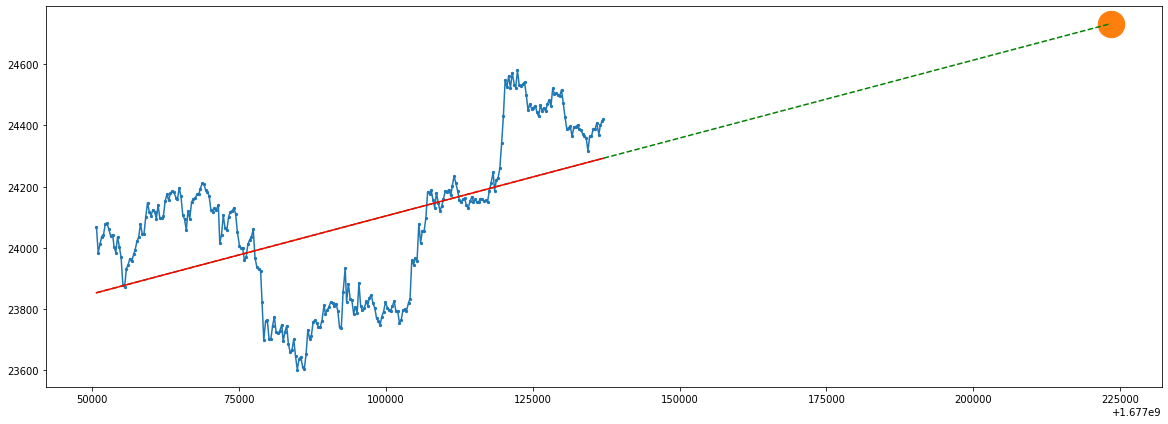

In [129]:
import time
import pandas as pd
from matplotlib import dates as mdates

t = int(time.time())  #現在時刻のunixtimeを取得
t = t + 86400         #1日後(86400sec)の時間

P = np.append(x, t).reshape(-1, 1)

plt.figure(figsize=(20,7))
plt.scatter(x,y,5)
plt.plot(x,y)

#予測部分は破線とする
plt.plot(P, lr.predict(P), color = 'green', linestyle='dashed')
plt.plot(X, lr.predict(X), color = 'red')
plt.scatter([[t]], lr.predict([[t]]),700) 
plt.show()